<a href="https://colab.research.google.com/github/Smehta1234/-Fuel_cell_performance/blob/main/fuel_cell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                            MSE        R2
Linear Regression                      0.106163  0.635600
Random Forest                          0.112747  0.612999
XGBoost                                0.122560  0.579317
Neural Network                         0.152749  0.475695
Support Vector Regressor (RBF Kernel)  0.156395  0.463179

Best Model: Linear Regression with R2: 0.6356


<ipython-input-2-3a3bbcc91d76>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')


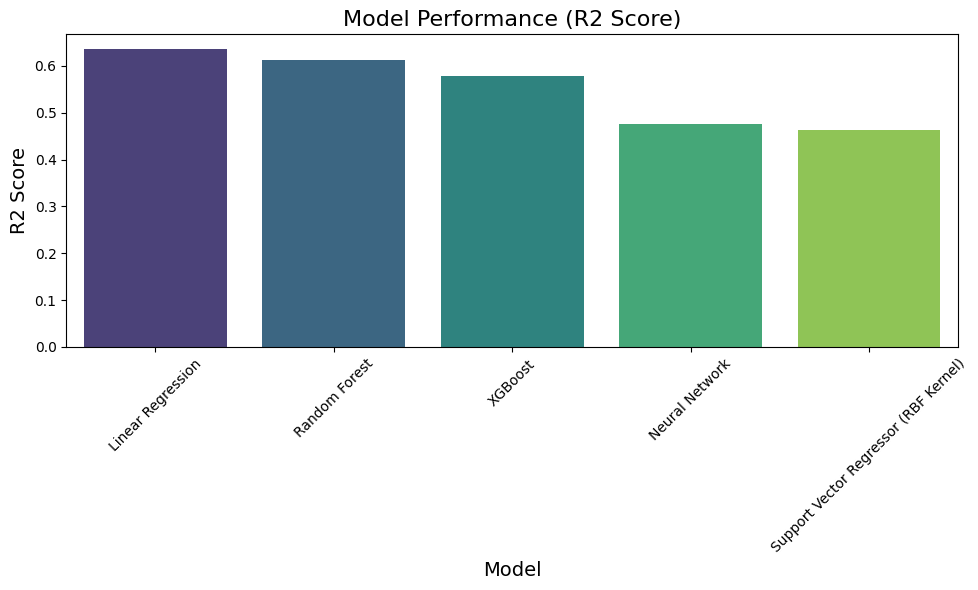

<ipython-input-2-3a3bbcc91d76>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='coolwarm')


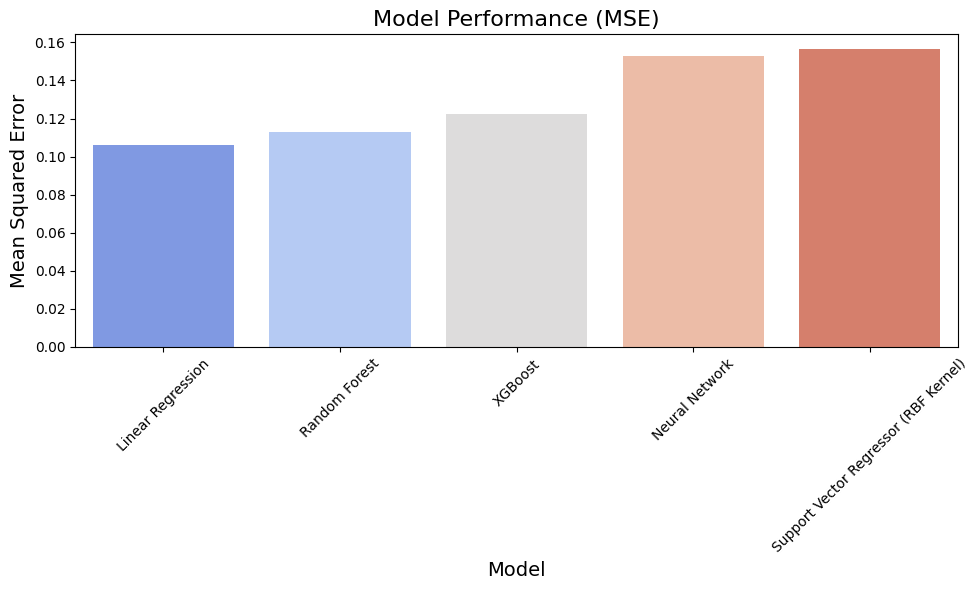

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

data = pd.read_csv('/content/drive/MyDrive/Fuel_cell_performance_data-Full.csv')

X = data.drop(columns=['Target1', 'Target3', 'Target4', 'Target5', 'Target2'])
y = data['Target2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Support Vector Regressor (RBF Kernel)': SVR(kernel='rbf', C=150, gamma=0.05),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)
}

results = {}
for name, model in models.items():
    if name in ['Support Vector Regressor (RBF Kernel)', 'Neural Network']:

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
print(results_df)

best_model = results_df.idxmax()['R2']
best_r2 = results_df.loc[best_model, 'R2']
print(f"\nBest Model: {best_model} with R2: {best_r2:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')
plt.title('Model Performance (R2 Score)', fontsize=16)
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='coolwarm')
plt.title('Model Performance (MSE)', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
